In [1]:
""" #For colab
!pip install \
'git+https://github.com/facebookresearch/segment-anything.git'
!pip install -q roboflow supervision
!wget -q \
'https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth'
"""

" #For colab\n!pip install 'git+https://github.com/facebookresearch/segment-anything.git'\n!pip install -q roboflow supervision\n!wget -q 'https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth'\n"

In [2]:
import torch
from segment_anything import sam_model_registry

#DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
DEVICE = torch.device('cpu')
MODEL_TYPE = "vit_b"

sam = sam_model_registry[MODEL_TYPE](checkpoint="checkpoints/sam_vit_b.pth")
sam.to(DEVICE)

Sam(
  (image_encoder): ImageEncoderViT(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (blocks): ModuleList(
      (0-11): 12 x Block(
        (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=768, out_features=2304, bias=True)
          (proj): Linear(in_features=768, out_features=768, bias=True)
        )
        (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): Linear(in_features=3072, out_features=768, bias=True)
          (act): GELU(approximate='none')
        )
      )
    )
    (neck): Sequential(
      (0): Conv2d(768, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): LayerNorm2d()
      (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (3): LayerNorm2d()
    )


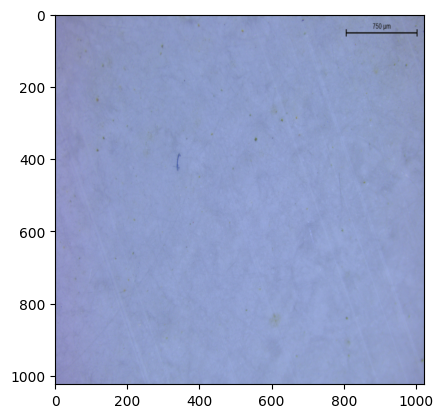

In [3]:
import cv2
from matplotlib import pyplot as plt

image_bgr = cv2.imread("ejemplos_fibras/Imagen001_Overlay.jpg")
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
image_rgb = cv2.resize(image_rgb, (1024, 1024))
plt.imshow(image_rgb)

In [4]:

from segment_anything import SamAutomaticMaskGenerator

#image_rgb = image_rgb.to(DEVICE)
mask_generator = SamAutomaticMaskGenerator(sam)
mask = mask_generator.generate(image_rgb)

In [5]:
print(mask[0].keys())
print(len(mask))

dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])
5


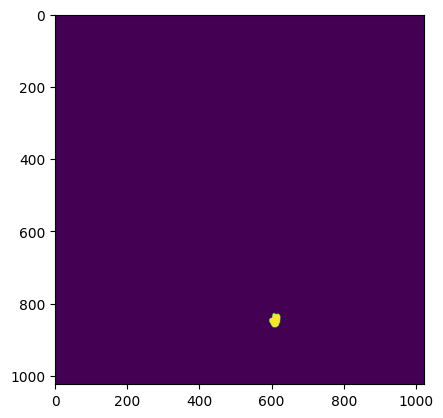

In [12]:
plt.imshow(mask[1]['segmentation'].astype(int)*255)

In [13]:
print(mask[1]['bbox'])

[593, 828, 30, 38]


: 

In [8]:
import numpy as np

def draw_masks_fromDict(image, masks_generated) :
  masked_image = image.copy()
  for i in range(len(masks_generated)) :
    masked_image = np.where(np.repeat(masks_generated[i]['segmentation'].astype(int)[:, :, np.newaxis], 3, axis=2),
                            np.random.choice(range(256), size=3),
                            masked_image)

    masked_image = masked_image.astype(np.uint8)

  return cv2.addWeighted(image, 0.3, masked_image, 0.7, 0)

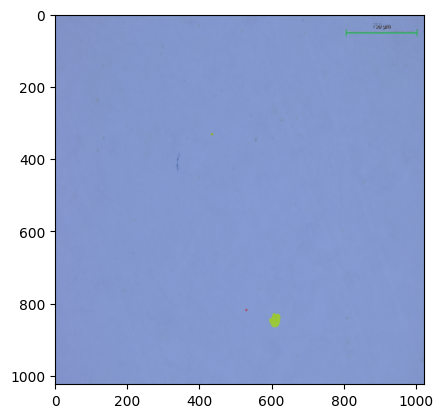

In [9]:
segmented_image = draw_masks_fromDict(image_rgb, mask)

plt.imshow(segmented_image, cmap='gray')

In [10]:
"""
n_mask = len(mask)

for n in n_mask:
    cv2.imwrite("masks/mask_{}.png".format(n), mask[n]['segmentation'].astype(int)*255)
"""

'\nn_mask = len(mask)\n\nfor n in n_mask:\n    cv2.imwrite("masks/mask_{}.png".format(n), mask[n][\'segmentation\'].astype(int)*255)\n'

In [11]:
"""
from PIL import Image
import os

images = []
for file in os.listdir("ejemplos_fibras"):
    if file.endswith(".jpg"):
        images.append(Image.open(os.path.join("ejemplos_fibras", file)))

import random
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
    axs[i].imshow(np.array(images[random.randint(0, len(images))]))
    axs[i].axis("off")
"""

'\nfrom PIL import Image\nimport os\n\nimages = []\nfor file in os.listdir("ejemplos_fibras"):\n    if file.endswith(".jpg"):\n        images.append(Image.open(os.path.join("ejemplos_fibras", file)))\n\nimport random\nimport matplotlib.pyplot as plt\nimport numpy as np\n\nfig, axs = plt.subplots(1, 3, figsize=(15, 5))\nfor i in range(3):\n    axs[i].imshow(np.array(images[random.randint(0, len(images))]))\n    axs[i].axis("off")\n'